<a href="https://colab.research.google.com/github/romanielrai/AI/blob/main/classification2517208.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==============================
# 1. DATA LOADING & UNDERSTANDING
# ==============================

import pandas as pd
import numpy as np

# Load dataset (DO NOT use sklearn datasets)
file_path = "/content/drive/MyDrive/waterQuality1.csv"
df = pd.read_csv(file_path)

# Display first rows
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [ ]:
# Dataset structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [ ]:
# Summary statistics
df.describe()


,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [ ]:
# Check missing values
df.isnull().sum()


,0
aluminium,0
ammonia,0
arsenic,0
barium,0
cadmium,0
chloramine,0
chromium,0
copper,0
flouride,0
bacteria,0


In [ ]:
# Check duplicates
df.duplicated().sum()


np.int64(0)

In [ ]:
# Class distribution (Assuming target column is 'Potability' or last column)
target_col = df.columns[-1]
df[target_col].value_counts(normalize=True)


,proportion
is_safe,
0,0.885611
1,0.114014
#NUM!,0.000375


In [ ]:
# ==============================
# 2. DATA CLEANING & PREPROCESSING
# ==============================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Convert 'ammonia' column to numeric, coercing errors to NaN
X['ammonia'] = pd.to_numeric(X['ammonia'], errors='coerce')

# Convert target variable 'y' to numeric, coercing errors to NaN
y = pd.to_numeric(y, errors='coerce')

# Drop rows where y is NaN to ensure target variable is clean
# Align X and y after dropping NaNs from y
non_nan_indices = y.dropna().index
X = X.loc[non_nan_indices]
y = y.loc[non_nan_indices]

# Handle missing values in X
imputer = SimpleImputer(strategy="median")
X = imputer.fit_transform(X)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


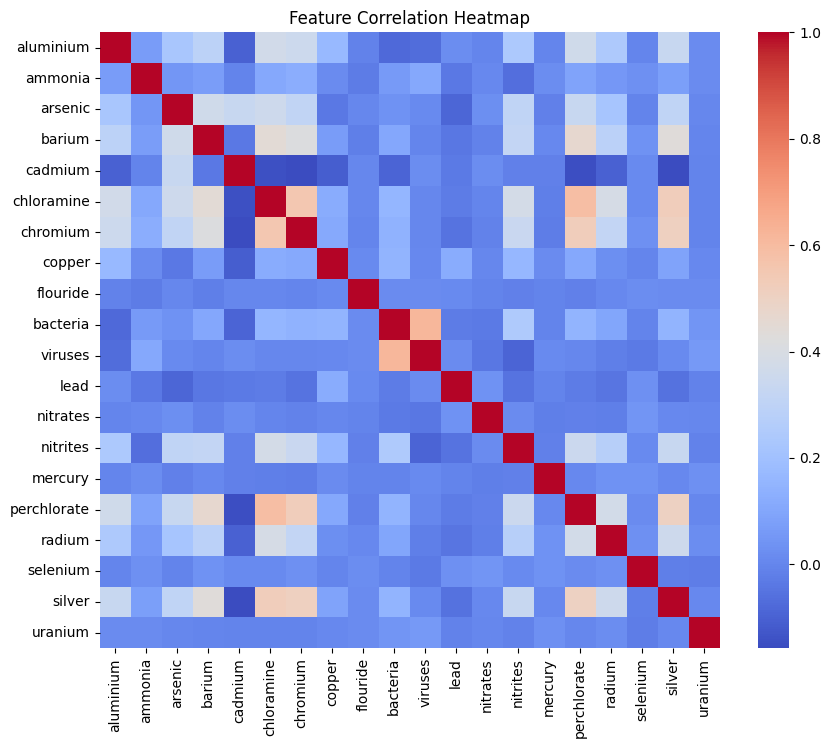

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(X_scaled, columns=df.columns[:-1]).corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


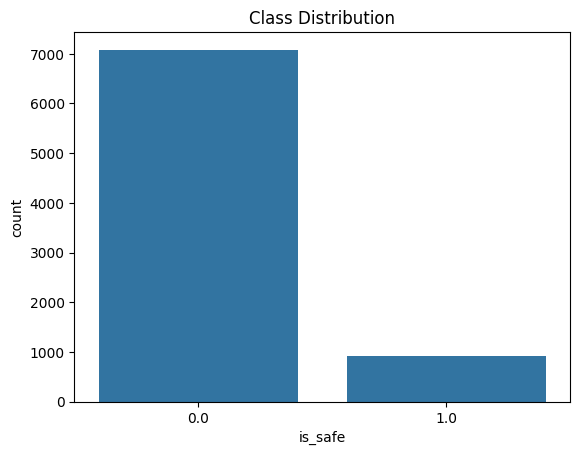

In [ ]:
# Target distribution
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()


In [ ]:
# ==============================
# 3. NEURAL NETWORK CLASSIFIER
# ==============================

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# MLP Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

# Predictions
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)

# Metrics
nn_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_nn),
    "Precision": precision_score(y_test, y_pred_nn),
    "Recall": recall_score(y_test, y_pred_nn),
    "F1": f1_score(y_test, y_pred_nn)
}

nn_metrics


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


{'Accuracy': 0.9475,
 'Precision': 0.9084507042253521,
 'Recall': 0.645,
 'F1': 0.7543859649122807}

In [ ]:
# ==============================
# 4. CLASSICAL ML MODELS
# ==============================

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [ ]:
# Evaluation Function
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred)
    }

lr_metrics = evaluate_model(y_test, y_pred_lr)
dt_metrics = evaluate_model(y_test, y_pred_dt)

lr_metrics, dt_metrics


({'Accuracy': 0.9025,
  'Precision': 0.75,
  'Recall': 0.33,
  'F1': 0.4583333333333333},
 {'Accuracy': 0.959375,
  'Precision': 0.8648648648648649,
  'Recall': 0.8,
  'F1': 0.8311688311688312})

In [ ]:
# ==============================
# 5. HYPERPARAMETER TUNING
# ==============================

from sklearn.model_selection import GridSearchCV

# Logistic Regression Grid Search
lr_params = {
    "C": [0.01, 0.1, 1, 10],
    "solver": ["liblinear", "lbfgs"]
}

lr_grid = GridSearchCV(LogisticRegression(), lr_params, cv=5, scoring="f1")
lr_grid.fit(X_train, y_train)

# Decision Tree Grid Search
dt_params = {
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring="f1")
dt_grid.fit(X_train, y_train)

lr_grid.best_params_, dt_grid.best_params_


({'C': 1, 'solver': 'liblinear'}, {'max_depth': 10, 'min_samples_split': 10})

In [ ]:
# ==============================
# 6. FEATURE SELECTION (Embedded Method)
# ==============================

from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(LogisticRegression(), threshold="median")
selector.fit(X_train, y_train)

X_train_fs = selector.transform(X_train)
X_test_fs = selector.transform(X_test)

X_train_fs.shape


(6396, 10)

In [ ]:
# ==============================
# 7. FINAL TRAINING & COMPARISON
# ==============================

# Retrain models with best params + selected features
final_lr = LogisticRegression(**lr_grid.best_params_)
final_lr.fit(X_train_fs, y_train)
final_dt = DecisionTreeClassifier(**dt_grid.best_params_, random_state=42)
final_dt.fit(X_train_fs, y_train)

# Predictions
y_pred_lr_final = final_lr.predict(X_test_fs)
y_pred_dt_final = final_dt.predict(X_test_fs)

final_lr_metrics = evaluate_model(y_test, y_pred_lr_final)
final_dt_metrics = evaluate_model(y_test, y_pred_dt_final)


In [ ]:
# Final Comparison Table
import pandas as pd

results = pd.DataFrame({
    "Model": ["Neural Network", "Logistic Regression", "Decision Tree"],
    "Accuracy": [nn_metrics["Accuracy"], final_lr_metrics["Accuracy"], final_dt_metrics["Accuracy"]],
    "Precision": [nn_metrics["Precision"], final_lr_metrics["Precision"], final_dt_metrics["Precision"]],
    "Recall": [nn_metrics["Recall"], final_lr_metrics["Recall"], final_dt_metrics["Recall"]],
    "F1": [nn_metrics["F1"], final_lr_metrics["F1"], final_dt_metrics["F1"]]
})

results


,Model,Accuracy,Precision,Recall,F1
0,Neural Network,0.947500,0.908451,0.645,0.754386
1,Logistic Regression,0.901250,0.776316,0.295,0.427536
2,Decision Tree,0.911875,0.668571,0.585,0.624000
